# PRIYANSH SANGULE CS16B021

# Question 1 : Broken Working [[0.6,0.4][0.2,0.8]] 

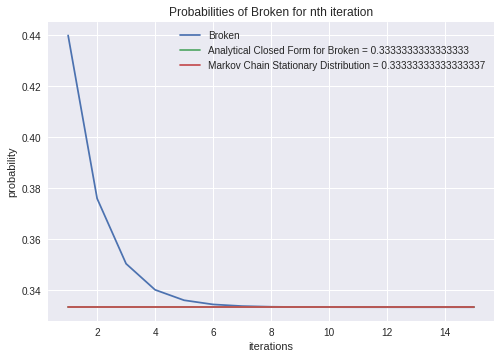

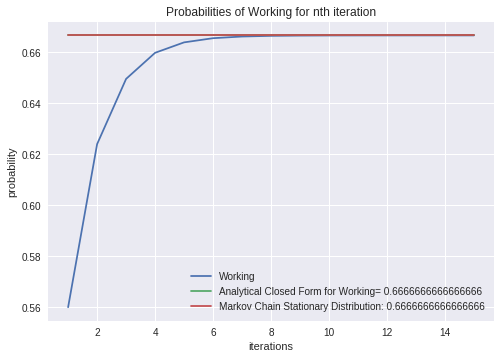

In [0]:
!pip install discreteMarkovChain
####### QUESTION #######
#          Broken  Working
# Broken  [ 0.6   0.4 ]
# Working [ 0.2   0.8 ]
#
########################

import numpy as np
import matplotlib.pyplot as plt
from discreteMarkovChain import markovChain

p = np.array([[ 0.6, 0.4], [ 0.2, 0.8]])

iterations = 15
p1= [] #Broken
p2= [] #Working
pn = p #nth probability matrix

for i in range(0,iterations):
  pn = pn.dot(p)
  p1.append(pn[0][0])
  p2.append(pn[0][1])

mc = markovChain(p)
mc.computePi('linear') 

x_list=[j+1 for j in range(0,iterations)]
analytical_broken=[float(1/3) for j in range(0,iterations)]
plt.plot(x_list,p1,label="Broken")
plt.plot(x_list,analytical_broken,label="Analytical Closed Form for Broken = "+str(analytical_broken[0]))
plt.plot(x_list,[mc.pi[0] for j in range(0,iterations)],label="Markov Chain Stationary Distribution = "+str(mc.pi[0]))
plt.title('Probabilities of Broken for nth iteration')
plt.xlabel('iterations')
plt.ylabel('probability')
plt.legend()
plt.show()

analytical_working=[float(2/3) for j in range(0,iterations)]
plt.plot(x_list,p2,label="Working")
plt.plot(x_list,analytical_working,label="Analytical Closed Form for Working= "+str(analytical_working[0]))
plt.plot(x_list,[mc.pi[1] for j in range(0,iterations)],label="Markov Chain Stationary Distribution: "+str(mc.pi[1]))
plt.title('Probabilities of Working for nth iteration')
plt.xlabel('iterations')
plt.ylabel('probability')
plt.legend()
plt.show()

# Question 2: If broken on 5th day, device is replaced with a working one

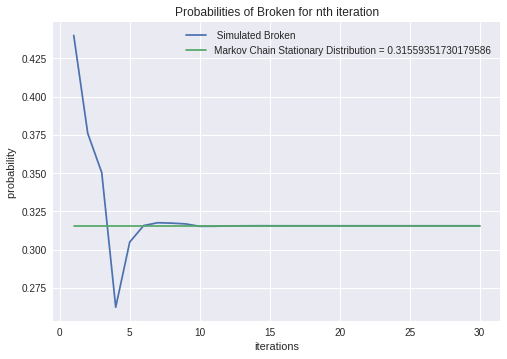

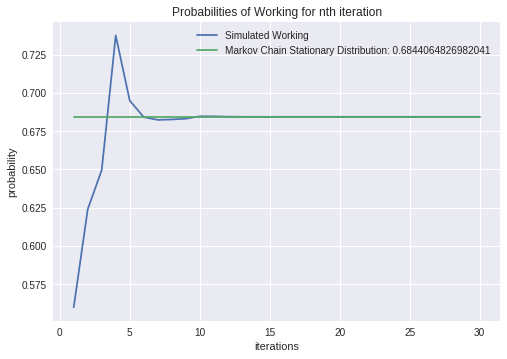

In [0]:
!pip install discreteMarkovChain
####### QUESTION #######
#          Broken1 Broken2 Broken3 Broken4 Broken5  Working
# Broken1  [ 0       0.6     0       0      0         0.4 ]
# Broken2  [ 0        0     0.6      0      0         0.4 ]
# Broken3  [ 0        0      0      0.6     0         0.4 ]
# Broken4  [ 0        0      0       0     0.6        0.4 ]
# Broken5  [ 0        0      0       0      0          1  ]
# Working  [ 0.2      0      0       0      0         0.8 ]
#
########################

import numpy as np
import matplotlib.pyplot as plt
from discreteMarkovChain import markovChain

p = np.array([[0,0.6,0,0,0,0.4],
              [0,0,0.6,0,0,0.4],
              [0,0,0,0.6,0,0.4],
              [0,0,0,0,0.6,0.4],
              [0,0,0,0,0,1],
              [0.2,0,0,0,0,0.8]
             ])

iterations = 30
p1= [] #Broken
p2= [] #Working
pn = p #nth probability matrix

#simulate markov chain problem for iterations
for i in range(0,iterations):
  pn = pn.dot(p)
  p1.append(pn[0][0]+pn[0][1]+pn[0][2]+pn[0][3]+pn[0][4]) #p(Broken) = Sum of all probabilities from Broken Day1 to Broken Day 5
  p2.append(pn[0][5]) #p(Working)
  
#Get Markov Chain Stationary Distribution
mc = markovChain(p)
mc.computePi('linear')

#Plotting for P(Broken)
x_list=[j+1 for j in range(0,iterations)]
plt.plot(x_list,p1,label=" Simulated Broken")
  #Final Broken Markov is sum of all probabilities of Broken Day 1 to Day 5
broken_markov = mc.pi[0]+mc.pi[1]+mc.pi[2]+mc.pi[3]+mc.pi[4]
plt.plot(x_list,[broken_markov for j in range(0,iterations)],label="Markov Chain Stationary Distribution = "+str(broken_markov))
plt.title('Probabilities of Broken for nth iteration')
plt.xlabel('iterations')
plt.ylabel('probability ')
plt.legend()
plt.show()

#Plotting for P(Working)
plt.plot(x_list,p2,label="Simulated Working")
plt.plot(x_list,[mc.pi[5] for j in range(0,iterations)],label="Markov Chain Stationary Distribution: "+str(mc.pi[5]))
plt.title('Probabilities of Working for nth iteration')
plt.xlabel('iterations')
plt.ylabel('probability')
plt.legend()
plt.show()